In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
!unzip gdrive/My\ Drive/archive.zip

Archive:  gdrive/My Drive/archive.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  

In [20]:
import os
print(os.listdir('/content/flowers'))


['dandelion', 'tulip', 'daisy', 'rose', 'sunflower']


In [21]:
import warnings 
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style 
import seaborn as sns

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop 
from tensorflow.keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf 
import random as rn

import cv2
import numpy as np
from tqdm import tqdm 
import os
from random import shuffle 
from zipfile import ZipFile 
from PIL import Image

In [26]:
X=[]
Z=[]
IMG_SIZE=150 
FLOWER_DAISY_DIR='/content/flowers/daisy' 
FLOWER_SUNFLOWER_DIR='/content/flowers/sunflower' 
FLOWER_TULIP_DIR='/content/flowers/tulip' 
FLOWER_DANDI_DIR='/content/flowers/dandelion' 
FLOWER_ROSE_DIR='/content/flowers/rose'

In [27]:
def assign_label(img,flower_type):
  return flower_type

In [28]:
def make_train_data(flower_type,DIR): 
  for img in tqdm(os.listdir(DIR)):
    label=assign_label(img,flower_type)
    path = os.path.join(DIR,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR) 
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    X.append(np.array(img)) 
    Z.append(str(label))

In [30]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 421.17it/s]

1528


In [31]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:02<00:00, 330.38it/s]

2261


In [32]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 385.65it/s]

3245


In [33]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 373.92it/s]

4297


In [34]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 416.19it/s]

5081


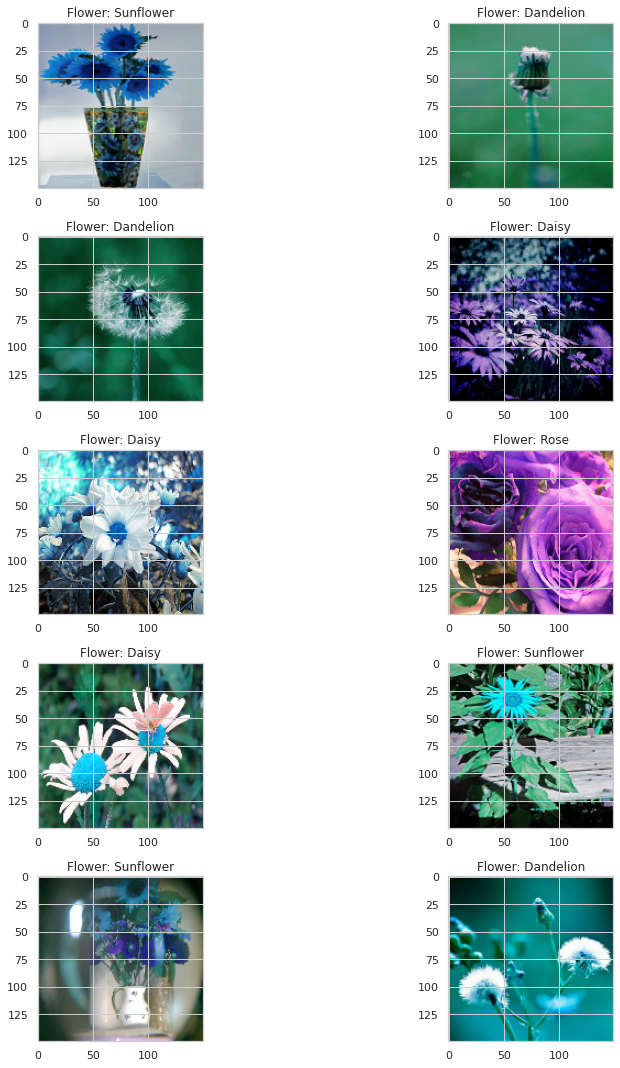

In [35]:
fig,ax=plt.subplots(5,2) 
fig.set_size_inches(15,15) 
for i in range(5):
  for j in range (2):
    l=rn.randint(0,len(Z))
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Flower: '+Z[l])
    
plt.tight_layout()

In [36]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5) 
X=np.array(X) 
X=X/255

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [40]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [41]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu')) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu')) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu')) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [42]:
batch_size=128 
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [65]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    vertical_flip=False,
    horizontal_flip=True, 
    rotation_range=10, 
    zoom_range = 0.1, 
    width_shift_range=0.2,  
    height_shift_range=0.2) 

datagen.fit(x_train)

In [44]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [46]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), 
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
29/29 [==============================] - 271s 9s/step - loss: 1.3449 - accuracy: 0.4180 - val_loss: 1.1392 - val_accuracy: 0.5122
Epoch 2/50
29/29 [==============================] - 254s 9s/step - loss: 1.0762 - accuracy: 0.5540 - val_loss: 1.0906 - val_accuracy: 0.5854
Epoch 3/50
29/29 [==============================] - 215s 7s/step - loss: 1.0310 - accuracy: 0.5880 - val_loss: 0.8883 - val_accuracy: 0.6546
Epoch 4/50
29/29 [==============================] - 214s 7s/step - loss: 0.9528 - accuracy: 0.6304 - val_loss: 0.8764 - val_accuracy: 0.6546
Epoch 5/50
29/29 [==============================] - 214s 7s/step - loss: 0.9129 - accuracy: 0.6393 - val_loss: 0.8725 - val_accuracy: 0.6829
Epoch 6/50
29/29 [==============================] - 214s 7s/step - loss: 0.8702 - accuracy: 0.6719 - val_loss: 0.8219 - val_accuracy: 0.6916
Epoch 7/50
29/29 [==============================] - 214s 7s/step - loss: 0.8233 - accuracy: 0.6885 - val_loss: 0.8124 - val_accuracy: 0.6814
Epoch 8/50
29

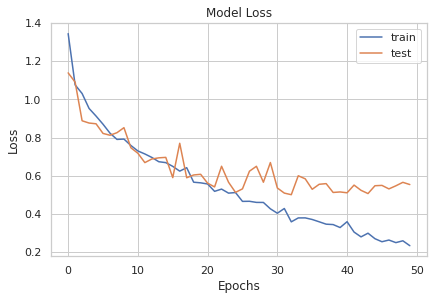

In [53]:
plt.plot(History.history['loss']) 
plt.plot(History.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend(['train', 'test']) 
plt.show()

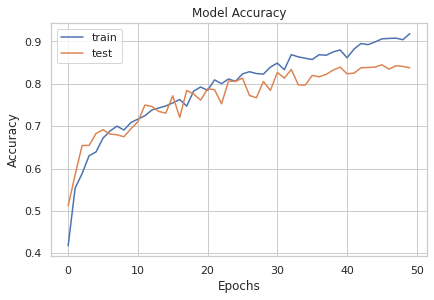

In [54]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('Epochs')
plt.legend(['train', 'test']) 
plt.show()

In [55]:
pred=model.predict(x_test) 
pred_digits=np.argmax(pred,axis=1)

In [56]:
i=0 
prop_class=[] 
mis_class=[]

for i in range(len(y_test)):
  if(np.argmax(y_test[i])==pred_digits[i]):
    prop_class.append(i) 
    if(len(prop_class)==8):
      break
i=0
for i in range(len(y_test)):
  if(not np.argmax(y_test[i])==pred_digits[i]): 
    mis_class.append(i)
    if(len(mis_class)==8): 
      break

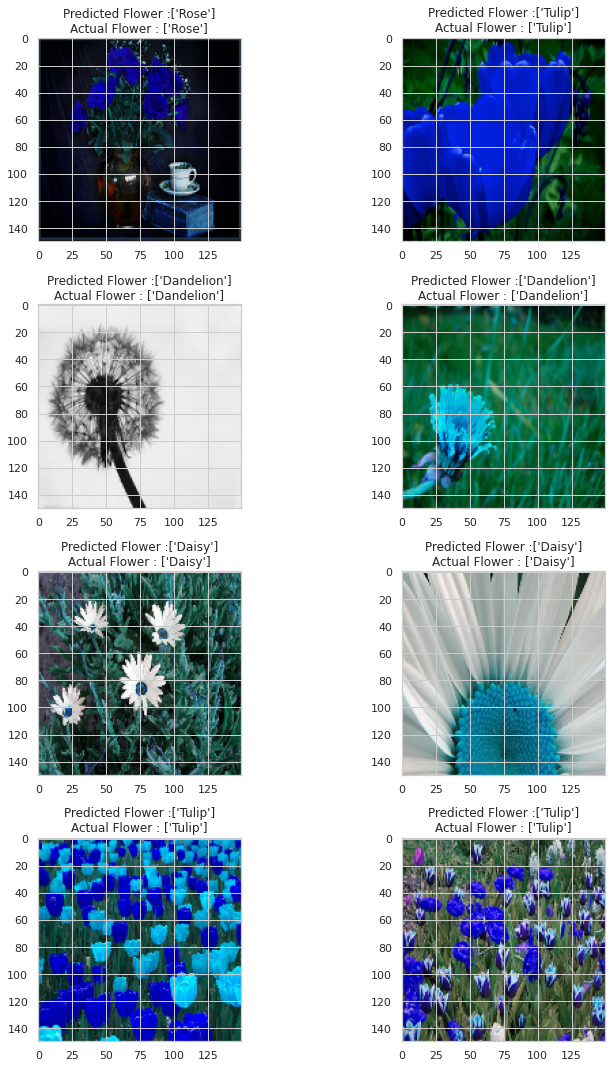

In [63]:
warnings.filterwarnings('always') 
warnings.filterwarnings('ignore')

count=0 
fig,ax=plt.subplots(4,2) 
fig.set_size_inches(15,15) 
for i in range (4):
  for j in range (2):
    ax[i,j].imshow(x_test[prop_class[count]])
    ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])]))) 
    plt.tight_layout()
    count+=1

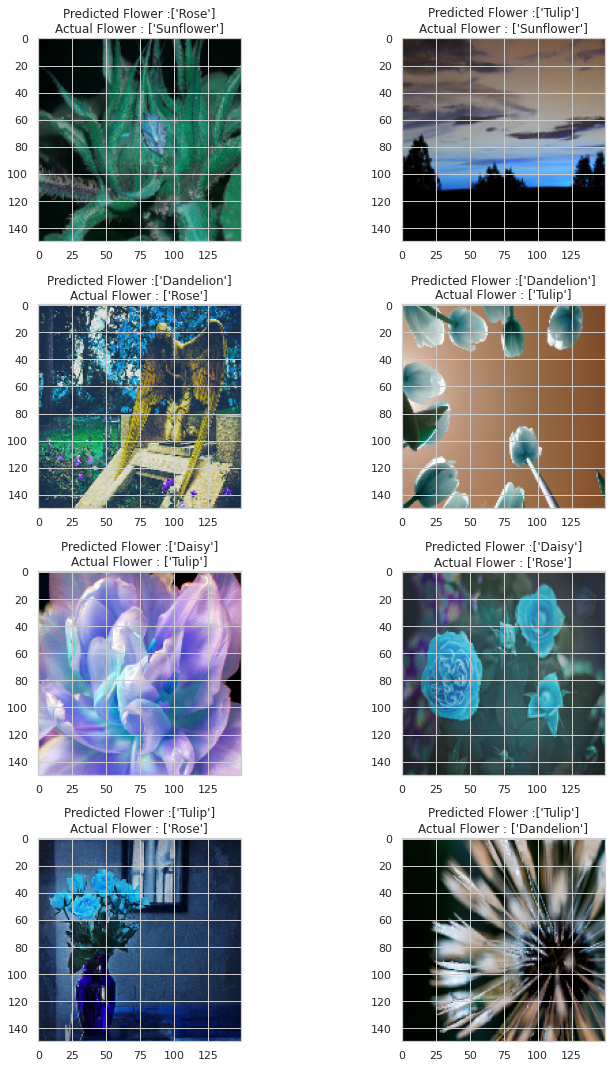

In [64]:
warnings.filterwarnings('always') 
warnings.filterwarnings('ignore')

count=0 

fig,ax=plt.subplots(4,2) 
fig.set_size_inches(15,15) 
for i in range (4):
  for j in range (2):
    ax[i,j].imshow(x_test[mis_class[count]])
    ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
    plt.tight_layout()
    count+=1